In [1]:
import sys
import time
from datetime import datetime
import pandas as pd
import geopandas as gpd
import numpy as np
import glob as glb
from shapely.geometry import box
from shapely.geometry import Polygon
from shapely.geometry import Point
import shapely.wkt
from datetimerange import DateTimeRange
import datetime as dt
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

In [2]:
import numpy as np

In [94]:
# noaa_path_apendix = r'E:\ISP_files\appendix_noaa_ars_plages_n_updated (4).csv'

In [3]:
noaa_path = r'E:\Paper_Material\appendix_noaa_ars_plages_n_updated.csv'

In [4]:
#get noaa_file
def get_noaa_ar_df(file_path):
    noaa_ar = pd.read_csv(file_path)
    noaa_ar = noaa_ar.rename(columns={'Unnamed: 0': 'id'})
    noaa_ar = noaa_ar.set_index("id")
    noaa_ar['year'] = noaa_ar['year'].astype(str)
    noaa_ar['month'] = noaa_ar['month'].astype(str)
    noaa_ar['day'] = noaa_ar['day'].astype(str)
    noaa_ar['ar_time'] = pd.to_datetime(noaa_ar[['year', 'month', 'day']].apply(lambda x: '-'.join(x), axis=1))
    noaa_ar['Datetime_st_time'] = noaa_ar['ar_time'].apply(lambda row: row - dt.timedelta(hours = 12))
    noaa_ar['Datetime_ed_time'] = noaa_ar['ar_time'].apply(lambda row: row + dt.timedelta(hours = 12))
    noaa_ar['longitude'] = noaa_ar['central_meridian_dist']
    noaa_ar['latitude'] = noaa_ar['latitude']
    
    
    df = noaa_ar[['ar_time','noaa_ar_no','longitude','latitude','corr_whole_spot_area','mcintosh','LL','number_of_spots','greenwich','Datetime_st_time','Datetime_ed_time']]
    
    
    return df

In [4]:
#get noaa_file
def get_appendix_noaa_ar_df(file_path):
    noaa_ar = pd.read_csv(file_path)
    noaa_ar = noaa_ar.rename(columns={'Unnamed: 0': 'id'})
    noaa_ar = noaa_ar.set_index("id")
    noaa_ar['year'] = noaa_ar['year'].astype(str)
    noaa_ar['month'] = noaa_ar['month'].astype(str)
    noaa_ar['day'] = noaa_ar['day'].astype(str)
    noaa_ar['ar_time'] = pd.to_datetime(noaa_ar[['year', 'month', 'day']].apply(lambda x: '-'.join(x), axis=1))
#     noaa_ar['Datetime_st_time'] = noaa_ar['ar_time'].apply(lambda row: row - dt.timedelta(hours = 12))
#     noaa_ar['Datetime_ed_time'] = noaa_ar['ar_time'].apply(lambda row: row + dt.timedelta(hours = 12))
#     noaa_ar['longitude'] = noaa_ar['central_meridian_dist']
#     noaa_ar['latitude'] = noaa_ar['latitude']
    
    
#     df = noaa_ar[['ar_time','noaa_ar_no','longitude','latitude','corr_whole_spot_area','mcintosh','LL','number_of_spots','greenwich','Datetime_st_time','Datetime_ed_time']]
    
    
    return noaa_ar

In [5]:
noaa_df_appendix = get_appendix_noaa_ar_df(noaa_path)

In [6]:
longitude_series = pd.notnull(noaa_df_appendix['original_central_meridian_dist']) 
latitude_series = pd.notnull(noaa_df_appendix['original_latitude']) 

In [7]:
noaa_df_appendix[longitude_series|latitude_series]

year month day  noaa_ar_no  central_meridian_dist  latitude  \
id                                                                   
73     2010     2  14       11048                    -78        23   
178    2010     3  28       11058                     34        25   
311    2010     5  27       11072                     52       -15   
330    2010     6   4       11076                     28       -19   
716    2010    11   7       11120                     17        41   
...     ...   ...  ..         ...                    ...       ...   
13661  2015    12  10       12464                    -17       -12   
14087  2016     3   3       12511                    -46         5   
14647  2016     8   9       12574                    -65         6   
15608  2017     9  29       12683                    -31        14   
15611  2017     9  30       12683                    -19        14   

       carrington_longitude  corr_whole_spot_area mcintosh   LL  \
id                                                                
73                     87.0                   NaN     None  NaN   
178                   267.0                   NaN     None  NaN   
311                   319.0                  50.0      Hsx  2.0   
330                   189.0                 190.0      Dho  8.0   
716                   273.0                   0.0      Axx  1.0   
...                     ...                   ...      ...  ...   
13661                 191.0                   NaN     None  NaN   
14087                 121.0                  10.0      Bxo  1.0   
14647                 170.0                  20.0      Bxo  3.0   
15608                 119.0                 280.0      Hkx  5.0   
15611                 111.0                 270.0      Hkx  4.0   

       number_of_spots greenwich  original_central_meridian_dist  \
id                                                                 
73                 NaN     Plage                           -90.0   
178                NaN     Plage                           -73.0   
311                1.0     Alpha                             NaN   
330                7.0      Beta                             NaN   
716                2.0     Alpha                            13.0   
...                ...       ...                             ...   
13661              NaN     Plage                           -13.0   
14087              3.0      Beta                           -57.0   
14647              2.0      Beta                             NaN   
15608              2.0     Alpha                           -26.0   
15611              2.0     Alpha                           -21.0   

       original_latitude    ar_time  
id                                   
73                   NaN 2010-02-14  
178                -21.0 2010-03-28  
311                -23.0 2010-05-27  
330                -27.0 2010-06-04  
716                  NaN 2010-11-07  
...                  ...        ...  
13661                NaN 2015-12-10  
14087                NaN 2016-03-03  
14647               14.0 2016-08-09  
15608                NaN 2017-09-29  
15611                NaN 2017-09-30  

[102 rows x 15 columns]

In [8]:
len(list(noaa_df_appendix[longitude_series|latitude_series]['noaa_ar_no'].unique()))

58

In [9]:
noaa_df_appendix[noaa_df_appendix['noaa_ar_no'].isin(list(noaa_df_appendix[longitude_series|latitude_series]['noaa_ar_no'].unique()))]

year month day  noaa_ar_no  central_meridian_dist  latitude  \
id                                                                   
73     2010     2  14       11048                    -78        23   
75     2010     2  15       11048                    -64        20   
79     2010     2  16       11048                    -50        21   
82     2010     2  17       11048                    -34        21   
85     2010     2  18       11048                    -24        20   
...     ...   ...  ..         ...                    ...       ...   
15622  2017    10   4       12683                     32        13   
15624  2017    10   5       12683                     45        13   
15626  2017    10   6       12683                     58        13   
15628  2017    10   7       12683                     71        13   
15629  2017    10   8       12683                     84        13   

       carrington_longitude  corr_whole_spot_area mcintosh   LL  \
id                                                                
73                     87.0                   NaN     None  NaN   
75                     96.0                  10.0      Bxo  5.0   
79                     97.0                  10.0      Bxo  5.0   
82                    100.0                  10.0      Bxo  3.0   
85                     97.0                  10.0      Axx  2.0   
...                     ...                   ...      ...  ...   
15622                 111.0                 330.0      Cko  4.0   
15624                 111.0                 300.0      Cko  6.0   
15626                 111.0                 280.0      Cko  5.0   
15628                 111.0                 270.0      Hkx  5.0   
15629                 111.0                 220.0      Hax  4.0   

       number_of_spots greenwich  original_central_meridian_dist  \
id                                                                 
73                 NaN     Plage                           -90.0   
75                 2.0      Beta                             NaN   
79                 3.0      Beta                             NaN   
82                 5.0      Beta                             NaN   
85                 4.0     Alpha                             NaN   
...                ...       ...                             ...   
15622              4.0      Beta                             NaN   
15624              6.0      Beta                             NaN   
15626              5.0      Beta                             NaN   
15628              1.0     Alpha                             NaN   
15629              1.0     Alpha                             NaN   

       original_latitude    ar_time  
id                                   
73                   NaN 2010-02-14  
75                   NaN 2010-02-15  
79                   NaN 2010-02-16  
82                   NaN 2010-02-17  
85                   NaN 2010-02-18  
...                  ...        ...  
15622                NaN 2017-10-04  
15624                NaN 2017-10-05  
15626                NaN 2017-10-06  
15628                NaN 2017-10-07  
15629                NaN 2017-10-08  

[639 rows x 15 columns]

In [12]:
noaa_df_appendix[noaa_df_appendix['noaa_ar_no'].isin(list(noaa_df_appendix[longitude_series|latitude_series]['noaa_ar_no'].unique()))].sort_values(by=['noaa_ar_no','ar_time']).to_csv(r'E:\Paper_Material\NOAA_trajectory_updated.csv',index=False)

In [85]:
noaa_df_appendix[noaa_df_appendix['noaa_ar_no']==12683]

year month day  noaa_ar_no  central_meridian_dist  latitude  \
id                                                                   
15599  2017     9  26       12683                    -76        11   
15602  2017     9  27       12683                    -60        12   
15605  2017     9  28       12683                    -46        13   
15608  2017     9  29       12683                    -31        14   
15611  2017     9  30       12683                    -19        14   
15614  2017    10   1       12683                     -8        13   
15617  2017    10   2       12683                      5        13   
15619  2017    10   3       12683                     19        13   
15622  2017    10   4       12683                     32        13   
15624  2017    10   5       12683                     45        13   
15626  2017    10   6       12683                     58        13   
15628  2017    10   7       12683                     71        13   
15629  2017    10   8       12683                     84        13   

       carrington_longitude  corr_whole_spot_area mcintosh   LL  \
id                                                                
15599                 109.0                 260.0      Hkx  3.0   
15602                 111.0                 160.0      Dao  5.0   
15605                 112.0                 270.0      Hkx  4.0   
15608                 119.0                 280.0      Hkx  5.0   
15611                 111.0                 270.0      Hkx  4.0   
15614                 111.0                 270.0      Hkx  4.0   
15617                 111.0                 270.0      Hkx  4.0   
15619                 111.0                 290.0      Hkx  3.0   
15622                 111.0                 330.0      Cko  4.0   
15624                 111.0                 300.0      Cko  6.0   
15626                 111.0                 280.0      Cko  5.0   
15628                 111.0                 270.0      Hkx  5.0   
15629                 111.0                 220.0      Hax  4.0   

       number_of_spots greenwich  original_central_meridian_dist  \
id                                                                 
15599              2.0     Alpha                             NaN   
15602              2.0      Beta                             NaN   
15605              2.0     Alpha                             NaN   
15608              2.0     Alpha                           -26.0   
15611              2.0     Alpha                           -21.0   
15614              2.0     Alpha                             NaN   
15617              2.0     Alpha                             NaN   
15619              4.0     Alpha                             NaN   
15622              4.0      Beta                             NaN   
15624              6.0      Beta                             NaN   
15626              5.0      Beta                             NaN   
15628              1.0     Alpha                             NaN   
15629              1.0     Alpha                             NaN   

       original_latitude    ar_time  
id                                   
15599                NaN 2017-09-26  
15602                NaN 2017-09-27  
15605                NaN 2017-09-28  
15608                NaN 2017-09-29  
15611                NaN 2017-09-30  
15614                NaN 2017-10-01  
15617                NaN 2017-10-02  
15619                NaN 2017-10-03  
15622                NaN 2017-10-04  
15624                NaN 2017-10-05  
15626                NaN 2017-10-06  
15628                NaN 2017-10-07  
15629                NaN 2017-10-08

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

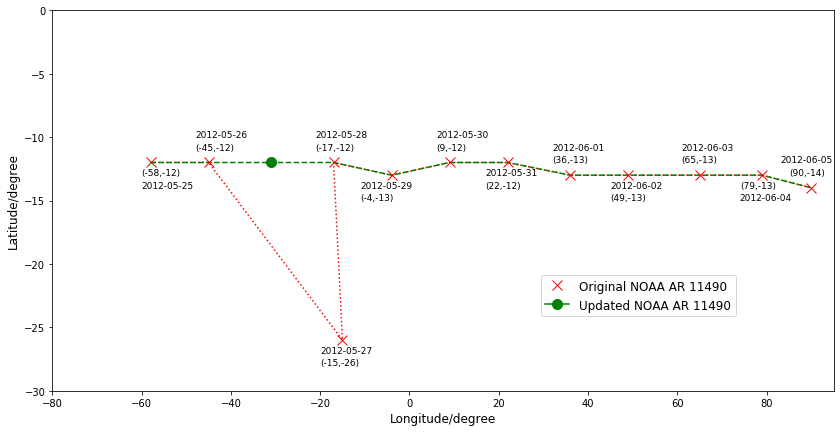

In [21]:
plt.figure(figsize=(14,7))
# plt.tight_layout()
x_11490_o = [-58,-45,-15,-17,-4,9,22,36,49,65,79,90]
y_11490_o = [-12,-12,-26,-12,-13,-12,-12,-13,-13,-13,-13,-14]
x_11490_n_n = [-58,-45,-31,-17,-4,9,22,36,49,65,79,90]
y_11490_n_n = [-12,-12,-12,-12,-13,-12,-12,-13,-13,-13,-13,-14]
x_11490_n = [-31]
y_11490_n = [-12]
plt.xlim(-80,95)
plt.ylim(-30,0)


p3 = plt.plot(x_11490_o,y_11490_o,'r:')
p4 = plt.plot(x_11490_n_n,y_11490_n_n,'g--')


p1 = plt.plot(x_11490_o,y_11490_o,'rx',markersize=10)
p2 = plt.plot(x_11490_n,y_11490_n,color='green',marker = 'o',markersize=10)

plt.text(-60,-13,'(-58,-12)',fontsize=9)
plt.text(-60,-14,'2012-05-25',fontsize=9)

plt.text(-48,-11,'(-45,-12)',fontsize=9)
plt.text(-48,-10,'2012-05-26',fontsize=9)

plt.text(-20,-28,'(-15,-26)',fontsize=9)
plt.text(-20,-27,'2012-05-27',fontsize=9)

plt.text(-21,-11,'(-17,-12)',fontsize=9)
plt.text(-21,-10,'2012-05-28',fontsize=9)

plt.text(-11,-15,'(-4,-13)',fontsize=9)
plt.text(-11,-14,'2012-05-29',fontsize=9)

plt.text(6,-11,'(9,-12)',fontsize=9)
plt.text(6,-10,'2012-05-30',fontsize=9)

plt.text(17,-14,'(22,-12)',fontsize=9)
plt.text(17,-13,'2012-05-31',fontsize=9)

plt.text(32,-12,'(36,-13)',fontsize=9)
plt.text(32,-11,'2012-06-01',fontsize=9)

plt.text(45,-15,'(49,-13)',fontsize=9)
plt.text(45,-14,'2012-06-02',fontsize=9)

plt.text(61,-12,'(65,-13)',fontsize=9)
plt.text(61,-11,'2012-06-03',fontsize=9)

plt.text(74,-14,'(79,-13)',fontsize=9)
plt.text(74,-15,'2012-06-04',fontsize=9)

plt.text(85,-13,'(90,-14)',fontsize=9)
plt.text(83,-12,'2012-06-05',fontsize=9)



plt.xlabel('Longitude/degree',fontsize=12)
plt.ylabel('Latitude/degree',fontsize=12)
plt.legend((p1[0], p2[0]), ('Original NOAA AR 11490', 'Updated NOAA AR 11490'),loc='center', bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize = 12)

plt.savefig('NOAA_11490_B.pdf',dpi=600,bbox_inches='tight')
plt.show()

In [72]:
plt.figure(figsize=(14,7))
# plt.tight_layout()
x_11321_o = [-52,-37,-22,-9,3,18,34,48,62,76,90]
y_11321_o = [13,-14,-15,-14,-14,-14,-16,-16,-16,-16,-16]
x_11321_n_n = [-52,-37,-22,-9,3,18,34,48,62,76,90]
y_11321_n_n = [-14,-14,-15,-14,-14,-14,-16,-16,-16,-16,-16]
x_11321_n = [-52]
y_11321_n = [-14]
plt.xlim(-60,95)
plt.ylim(-25,20)


p3 = plt.plot(x_11321_o,y_11321_o,'r:')
p4 = plt.plot(x_11321_n_n,y_11321_n_n,'g--')


p1 = plt.plot(x_11321_o,y_11321_o,'rx',markersize=10)
p2 = plt.plot(x_11321_n,y_11321_n,color='green',marker = 'o',markersize=10)

#1st day
plt.text(-54,14,'(-52,13)',fontsize=9)
plt.text(-54,15.5,'2011-10-16',fontsize=9)

#2nd day
plt.text(-40,-16,'(-37,-14)',fontsize=9)
plt.text(-41,-17.5,'2011-10-17',fontsize=9) #date under the coordinates

#3rd day
plt.text(-27,-14,'(-22,-15)',fontsize=9)
plt.text(-27,-12.5,'2011-10-18',fontsize=9)

#4th day
plt.text(-13,-16,'(-9,-14)',fontsize=9)
plt.text(-13,-17.5,'2011-10-19',fontsize=9)#date under the coordinates

#5th day
plt.text(-1,-13,'(3,-14)',fontsize=9)
plt.text(-1,-11.5,'2011-10-20',fontsize=9)

#6th day
plt.text(15,-16,'(18,-14)',fontsize=9)
plt.text(15,-17.5,'2011-10-21',fontsize=9)#date under the coordinates

#7th day
plt.text(30,-15,'(34,-16)',fontsize=9)
plt.text(30,-13.5,'2011-10-22',fontsize=9)

#8th day
plt.text(45,-18,'(48,-16)',fontsize=9)
plt.text(45,-19.5,'2011-10-23',fontsize=9)#date under the coordinates

#9th day
plt.text(58,-15,'(62,-16)',fontsize=9)
plt.text(58,-13.5,'2011-10-24',fontsize=9)

#10th day
plt.text(72,-18,'(76,-16)',fontsize=9)
plt.text(72,-19.5,'2011-10-25',fontsize=9)#date under the coordinates

#11th day
plt.text(84,-15,'(90,-16)',fontsize=9)
plt.text(83,-13.5,'2011-10-26',fontsize=9)





plt.xlabel('Longitude/degree',fontsize=12)
plt.ylabel('Latitude/degree',fontsize=12)
plt.legend((p1[0], p2[0]), ('Original NOAA AR 11321', 'Updated NOAA AR 11321'),loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize = 12)

plt.savefig('NOAA_11321_B.pdf',dpi=600,bbox_inches='tight')
plt.show()

In [121]:
plt.figure(figsize=(14,7))
# plt.tight_layout()
x_11963_o = [-56,-44,-34,-18,-3,10,25,40,54,68,82]
y_11963_o = [-6,-6,-6,-7,-7,-6,-6,-18,-18,-18,-18]
x_11963_n_n = [-56,-44,-34,-18,-3,10,25,40,54,68,82]
y_11963_n_n = [-6,-6,-6,-7,-7,-6,-6,-6,-6,-6,-6]
x_11963_n = [40,54,68,82]
y_11963_n = [-6,-6,-6,-6]
plt.xlim(-65,95)
plt.ylim(-25,0)


p3 = plt.plot(x_11963_o,y_11963_o,'r:')
p4 = plt.plot(x_11963_n_n,y_11963_n_n,'g--')


p1 = plt.plot(x_11963_o,y_11963_o,'rx',markersize=10)
p2 = plt.plot(x_11963_n,y_11963_n,color='green',marker = 'o',markersize=10)

#1st day
plt.text(-60,-5.5,'(-56,-6)',fontsize=9)
plt.text(-60,-4.5,'2014-01-22',fontsize=9)

#2nd day
plt.text(-48,-7,'(-44,-6)',fontsize=9)
plt.text(-48,-8,'2014-01-23',fontsize=9) #date under the coordinates

#3rd day
plt.text(-38,-5.5,'(-34,-6)',fontsize=9)
plt.text(-38,-4.5,'2014-01-24',fontsize=9)

#4th day
plt.text(-22,-8,'(-18,-7)',fontsize=9)
plt.text(-22,-9,'2014-01-25',fontsize=9)#date under the coordinates

#5th day
plt.text(-7,-6.5,'(-3,-7)',fontsize=9)
plt.text(-8,-5.5,'2014-01-26',fontsize=9)

#6th day
plt.text(6,-7,'(10,-6)',fontsize=9)
plt.text(6,-8,'2014-01-27',fontsize=9)#date under the coordinates

#7th day
plt.text(21,-5.5,'(25,-6)',fontsize=9)
plt.text(21,-4.5,'2014-01-28',fontsize=9)

#8th day
plt.text(36,-19,'(40,-18)',fontsize=9)
plt.text(36,-20,'2014-01-29',fontsize=9)#date under the coordinates

#9th day
plt.text(50,-17,'(54,-18)',fontsize=9)
plt.text(49,-16,'2014-01-30',fontsize=9)

#10th day
plt.text(64,-19,'(68,-18)',fontsize=9)
plt.text(63,-20,'2014-01-31',fontsize=9)#date under the coordinates

#11th day
plt.text(78,-17,'(82,-18)',fontsize=9)
plt.text(77,-16,'2014-02-01',fontsize=9)





plt.xlabel('Longitude/degree',fontsize=12)
plt.ylabel('Latitude/degree',fontsize=12)
plt.legend((p1[0], p2[0]), ('Original NOAA AR 11963', 'Updated NOAA AR 11963'),loc='lower left', bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize = 12)

plt.savefig('NOAA_11963_B.pdf',dpi=600,bbox_inches='tight')
plt.show()

In [17]:
noaa_df = get_noaa_ar_df(noaa_path)

In [28]:
len(list(noaa_df[(noaa_df['ar_time']>=pd.datetime(2010,5,1)) & (noaa_df['ar_time']<pd.datetime(2018,10,1))]['noaa_ar_no'].unique()))

1661

In [29]:
#SPoCA

In [31]:
def get_spoca(file_path):
    
    df = pd.read_csv(file_path)
    
    df['event_date'] = pd.to_datetime(df['event_date'])
    
    df['event_starttime'] = pd.to_datetime(df['event_starttime'])
    
    df['event_endtime'] = pd.to_datetime(df['event_endtime'])
    
    df['hgs_bbox'] = df['hgs_bbox'].apply(shapely.wkt.loads)
    
    #df['spoca_id'] = df['spoca_id'].astype('int64')
    
    print('finish loading')
    
    return df

In [32]:
spoca_path = r'C:\Users\Sumi\Desktop\SpoCA_harp_test\Spoca_w_id_all.csv'

In [33]:
spoca_df = get_spoca(spoca_path)

finish loading


In [40]:
len(list(spoca_df[spoca_df['event_date']<pd.datetime(2018,10,1)]['spoca_id'].unique()))

14375

In [64]:
spoca_df[spoca_df['event_date']<pd.datetime(2018,10,1)]

event_date     event_starttime       event_endtime  \
0      2010-05-13 2010-05-13 00:04:06 2010-05-13 05:00:06   
1      2010-05-13 2010-05-13 05:00:06 2010-05-13 09:00:06   
2      2010-05-13 2010-05-13 09:00:06 2010-05-13 14:00:06   
3      2010-05-13 2010-05-13 14:00:06 2010-05-13 18:04:42   
4      2010-05-13 2010-05-13 18:04:42 2010-05-13 23:00:06   
...           ...                 ...                 ...   
100025 2018-09-30 2018-09-30 10:35:58 2018-09-30 14:36:10   
100026 2018-09-30 2018-09-30 10:35:58 2018-09-30 14:36:10   
100027 2018-09-30 2018-09-30 14:36:10 2018-09-30 18:36:10   
100028 2018-09-30 2018-09-30 18:36:10 2018-09-30 22:36:10   
100029 2018-09-30 2018-09-30 22:36:10 2018-10-01 01:36:10   

                          hgs_coord  \
0       POINT(44.433504 -18.988383)   
1        POINT(45.36299 -19.874635)   
2       POINT(50.454685 -20.503638)   
3       POINT(52.337164 -19.711288)   
4       POINT(55.194853 -19.485442)   
...                             ...   
100025  POINT(8.6582367 -10.029431)   
100026  POINT(63.085593 0.22527131)   
100027  POINT(11.128528 -9.6467199)   
100028  POINT(13.475351 -9.4470845)   
100029  POINT(15.464492 -9.5211473)   

                                                 hgs_bbox  \
0       POLYGON ((38.948996 -22.995983, 51.446859 -22....   
1       POLYGON ((40.128059 -23.989737, 56.432295 -23....   
2       POLYGON ((40.262057 -29.050991, 67.73366900000...   
3       POLYGON ((45.183075 -23.95292, 65.391279999999...   
4       POLYGON ((48.465852 -23.905548, 66.680778 -23....   
...                                                   ...   
100025  POLYGON ((5.940526 -13.21492, 11.220553 -13.31...   
100026  POLYGON ((61.122208 -0.63549, 65.218576 -1.070...   
100027  POLYGON ((8.402065 -12.689651, 13.788747 -12.8...   
100028  POLYGON ((10.90475 -12.97554, 16.392553 -13.13...   
100029  POLYGON ((12.577407 -12.720457, 17.756303 -12....   

                      hpc_coord  \
0       POINT(630.315 -276.716)   
1       POINT(637.105 -291.513)   
2       POINT(687.412 -304.493)   
3       POINT(709.163 -293.344)   
4       POINT(736.449 -291.685)   
...                         ...   
100025  POINT(142.575 -276.501)   
100026  POINT(855.618 -47.3599)   
100027  POINT(183.014 -269.403)   
100028   POINT(221.09 -265.096)   
100029  POINT(252.929 -265.207)   

                                                 hpc_bbox    hpc_x     hpc_y  \
0       POLYGON((551.1 -336.9,687.3 -336.9,687.3 -213....  630.315 -276.7160   
1       POLYGON((560.7 -353.1,727.5 -353.1,727.5 -210....  637.105 -291.5130   
2       POLYGON((537.9 -429.9,776.7 -429.9,776.7 -210....  687.412 -304.4930   
3       POLYGON((617.1 -355.5,794.7 -355.5,794.7 -207....  709.163 -293.3440   
4       POLYGON((651.3 -356.7,802.5 -356.7,802.5 -207....  736.449 -291.6850   
...                                                   ...      ...       ...   
100025  POLYGON((96.9 -327.9,182.1 -327.9,182.1 -227.7...  142.575 -276.5010   
100026  POLYGON((840.3 -65.1,870.9 -65.1,870.9 -29.7,8...  855.618  -47.3599   
100027  POLYGON((137.1 -318.9,223.5 -318.9,223.5 -216....  183.014 -269.4030   
100028  POLYGON((177.3 -322.5,264.3 -322.5,264.3 -218....  221.090 -265.0960   
100029  POLYGON((204.3 -317.7,285.9 -317.7,285.9 -221....  252.929 -265.2070   

       obs_instrument                    SOL_standard frm_name  \
0                 AIA  SOL2010-05-13T00:04:06L136C108    SPoCA   
1                 AIA  SOL2010-05-13T05:00:06L135C109    SPoCA   
2                 AIA  SOL2010-05-13T09:00:06L138C110    SPoCA   
3                 AIA  SOL2010-05-13T14:00:06L137C109    SPoCA   
4                 AIA  SOL2010-05-13T18:04:42L137C109    SPoCA   
...               ...                             ...      ...   
100025            AIA  SOL2018-09-30T10:35:58L358C100    SPoCA   
100026            AIA  SOL2018-09-30T10:35:58L051C090    SPoCA   
100027            AIA  SOL2018-09-30T14:36:10L358C099    SPoCA   
100028            AIA  SOL2018

In [ ]:
#SHARP READER

In [41]:
def get_sharp(file_path):
        
    data_sharp ={}
    
    for filename in file_path:

        #ubuntun harp_name = filename.split("/")[-1].rstrip('.csv')
        harp_name = filename.split("\\")[-1].rstrip('.csv')
        
        df = pd.read_csv(filename, header=0,parse_dates=True,date_parser=pd.to_datetime,index_col='Timestamp')
        
        df['hgs_poly'] = df['hgs_poly'].apply(lambda row: shapely.wkt.loads(row) if type(row) is str else None )
        
        data_sharp[int(harp_name)] = df
        
    
    return data_sharp

In [44]:
sharp_out_folder = r'E:\Sharp_hgs_poly'
sharp_files = glb.glob(sharp_out_folder + "/*.csv")
sharp_f_dic = get_sharp(sharp_files)


In [53]:
sharp_f_dic[6713]['LAT_MIN'].count()

1

In [54]:
HARP_individual_records = {'HARP_NUM':[],'number_of_records':[]}
for key in sharp_f_dic:
    
    HARP_individual_records['HARP_NUM'].append(key)
    HARP_individual_records['number_of_records'].append(sharp_f_dic[key]['LAT_MIN'].count())

In [55]:
HARP_individual_records_df = pd.DataFrame(HARP_individual_records)

In [59]:
HARP_individual_records_df[HARP_individual_records_df['number_of_records']==5]

HARP_NUM  number_of_records
1250       304                  5
1737      3840                  5
1912      4149                  5
2749      5558                  5
2832      5707                  5
3520      6746                  5

In [60]:
HARP_individual_records_df['number_of_records'].sum(axis=0)

2613321

In [62]:
HARP_individual_records_df.to_csv(r'E:\HARP_INDIVIDUAL_COUNT.csv')